# Анализ игровой индустрии

**Цель** - выявить закономерности, определяющие успешность игры, для формирования рекламных кампаний и выбор наиболее перспективного продукта.
**Задачи**:
1. Подготовить данные
2. Провести исследовательских анализ:
- Сколько игр выпускалось в разные годы
- Как менялись продажи в зависимости от платформ
- Определить актуальный период
- Изучить зависимость между отзывами и продажами
- Изучить распределение игр по жанрам, определить прибыльные
3. Составить портрет пользователя для каждого из регионов (Европа, СА, Япония):
- Топ 5 популярных платформ и жанров
- Изучить влияние рейтинга ESRB 
4. Проверка гипотез:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Данные** - набор исторических наблюдений до 2016 года.

*Описание данных*
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

# 1. Общая информация о данных:

Загрузим необходимые библиотеки, выгрузим файл и посмотрим общую информацию о датафрейме.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import math
import datetime

In [2]:
games = pd.read_csv('/datasets/games.csv')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Необходимо разобраться с пропусками и обонвить названия стобцов., изменить тип данных столбца `user_score` - это численный показатель.

In [3]:
for column in games.columns:
        print('Уникальные значения столбца', column)
        display(games[column].unique())

Уникальные значения столбца Name


array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

Уникальные значения столбца Platform


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Уникальные значения столбца Year_of_Release


array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Уникальные значения столбца Genre


array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Уникальные значения столбца NA_sales


array([4.136e+01, 2.908e+01, 1.568e+01, 1.561e+01, 1.127e+01, 2.320e+01,
       1.128e+01, 1.396e+01, 1.444e+01, 2.693e+01, 9.050e+00, 9.710e+00,
       9.000e+00, 8.920e+00, 1.500e+01, 9.010e+00, 7.020e+00, 9.430e+00,
       1.278e+01, 4.740e+00, 6.380e+00, 1.083e+01, 9.540e+00, 9.660e+00,
       8.410e+00, 6.060e+00, 3.430e+00, 5.510e+00, 6.850e+00, 9.040e+00,
       5.890e+00, 6.030e+00, 9.700e+00, 5.280e+00, 4.990e+00, 8.250e+00,
       8.520e+00, 5.540e+00, 6.990e+00, 6.620e+00, 5.030e+00, 5.990e+00,
       3.960e+00, 2.500e+00, 7.970e+00, 6.910e+00, 4.340e+00, 4.350e+00,
       3.010e+00, 6.160e+00, 6.760e+00, 4.020e+00, 4.890e+00, 2.960e+00,
       4.760e+00, 5.010e+00, 6.730e+00, 5.950e+00, 3.660e+00, 5.550e+00,
       7.040e+00, 6.650e+00, 3.880e+00, 5.800e+00, 4.100e+00, 5.930e+00,
       4.360e+00, 5.700e+00, 2.030e+00, 4.400e+00, 5.050e+00, 3.540e+00,
       1.120e+00, 6.820e+00, 1.750e+00, 3.740e+00, 1.060e+00, 2.790e+00,
       2.910e+00, 9.900e-01, 2.570e+00, 2.990e+00, 

Уникальные значения столбца EU_sales


array([2.896e+01, 3.580e+00, 1.276e+01, 1.093e+01, 8.890e+00, 2.260e+00,
       9.140e+00, 9.180e+00, 6.940e+00, 6.300e-01, 1.095e+01, 7.470e+00,
       6.180e+00, 8.030e+00, 4.890e+00, 8.490e+00, 9.090e+00, 4.000e-01,
       3.750e+00, 9.200e+00, 4.460e+00, 2.710e+00, 3.440e+00, 5.140e+00,
       5.490e+00, 3.900e+00, 5.350e+00, 3.170e+00, 5.090e+00, 4.240e+00,
       5.040e+00, 5.860e+00, 3.680e+00, 4.190e+00, 5.730e+00, 3.590e+00,
       4.510e+00, 2.550e+00, 4.020e+00, 4.370e+00, 6.310e+00, 3.450e+00,
       2.810e+00, 2.850e+00, 3.490e+00, 1.000e-02, 3.350e+00, 2.040e+00,
       3.070e+00, 3.870e+00, 3.000e+00, 4.820e+00, 3.640e+00, 2.150e+00,
       3.690e+00, 2.650e+00, 2.560e+00, 3.110e+00, 3.140e+00, 1.940e+00,
       1.950e+00, 2.470e+00, 2.280e+00, 3.420e+00, 3.630e+00, 2.360e+00,
       1.710e+00, 1.850e+00, 2.790e+00, 1.240e+00, 6.120e+00, 1.530e+00,
       3.470e+00, 2.240e+00, 5.010e+00, 2.010e+00, 1.720e+00, 2.070e+00,
       6.420e+00, 3.860e+00, 4.500e-01, 3.480e+00, 

Уникальные значения столбца JP_sales


array([3.770e+00, 6.810e+00, 3.790e+00, 3.280e+00, 1.022e+01, 4.220e+00,
       6.500e+00, 2.930e+00, 4.700e+00, 2.800e-01, 1.930e+00, 4.130e+00,
       7.200e+00, 3.600e+00, 2.400e-01, 2.530e+00, 9.800e-01, 4.100e-01,
       3.540e+00, 4.160e+00, 6.040e+00, 4.180e+00, 3.840e+00, 6.000e-02,
       4.700e-01, 5.380e+00, 5.320e+00, 5.650e+00, 1.870e+00, 1.300e-01,
       3.120e+00, 3.600e-01, 1.100e-01, 4.350e+00, 6.500e-01, 7.000e-02,
       8.000e-02, 4.900e-01, 3.000e-01, 2.660e+00, 2.690e+00, 4.800e-01,
       3.800e-01, 5.330e+00, 1.910e+00, 3.960e+00, 3.100e+00, 1.100e+00,
       1.200e+00, 1.400e-01, 2.540e+00, 2.140e+00, 8.100e-01, 2.120e+00,
       4.400e-01, 3.150e+00, 1.250e+00, 4.000e-02, 0.000e+00, 2.470e+00,
       2.230e+00, 1.690e+00, 1.000e-02, 3.000e+00, 2.000e-02, 4.390e+00,
       1.980e+00, 1.000e-01, 3.810e+00, 5.000e-02, 2.490e+00, 1.580e+00,
       3.140e+00, 2.730e+00, 6.600e-01, 2.200e-01, 3.630e+00, 1.450e+00,
       1.310e+00, 2.430e+00, 7.000e-01, 3.500e-01, 

Уникальные значения столбца Other_sales


array([8.450e+00, 7.700e-01, 3.290e+00, 2.950e+00, 1.000e+00, 5.800e-01,
       2.880e+00, 2.840e+00, 2.240e+00, 4.700e-01, 2.740e+00, 1.900e+00,
       7.100e-01, 2.150e+00, 1.690e+00, 1.770e+00, 3.960e+00, 1.057e+01,
       5.500e-01, 2.040e+00, 1.360e+00, 4.200e-01, 4.600e-01, 1.410e+00,
       1.780e+00, 5.000e-01, 1.180e+00, 8.000e-01, 1.160e+00, 1.320e+00,
       5.900e-01, 2.380e+00, 1.130e+00, 7.800e-01, 2.420e+00, 1.120e+00,
       1.280e+00, 1.570e+00, 1.300e+00, 1.010e+00, 9.100e-01, 1.790e+00,
       1.970e+00, 8.600e-01, 1.210e+00, 2.300e-01, 7.600e-01, 7.400e-01,
       7.530e+00, 2.900e-01, 1.030e+00, 5.200e-01, 2.110e+00, 1.600e+00,
       1.610e+00, 3.500e-01, 9.700e-01, 1.060e+00, 6.300e-01, 1.500e-01,
       7.900e-01, 9.600e-01, 1.250e+00, 9.000e-01, 8.100e-01, 3.900e-01,
       6.800e-01, 8.500e-01, 1.800e-01, 8.000e-02, 6.700e-01, 7.000e-01,
       4.100e-01, 3.300e-01, 6.000e-01, 5.400e-01, 1.730e+00, 1.230e+00,
       1.600e-01, 1.110e+00, 3.100e-01, 4.800e-01, 

Уникальные значения столбца Critic_Score


array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Уникальные значения столбца User_Score


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Уникальные значения столбца Rating


array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [4]:
games.duplicated().sum()

0

Большое количество пропусков в столбцах `critic_score`, `user_score`, `rating`. В наше время у подавляющего числа игр есть оценки. Для игр постарше, вероятно, это не было такой распространённой практикой. Кроме того, не все игры и далеко не сразу получают оценку от рейтинговых агенств. Оценку критиков можно заменить значением -1, чтобы удобно было фильтровать. Заполнять средним или медианным значением по жанру, даже в разрезе по годам и консолям будет неправильным. Такая же история со столбцами `rating`, `user_score`. 

Столбец с годом выпуска имеет около 1,5% пропусков. Корректно их заполнить не представляется возможным, в то же время их мало, и эти данные не являются для нас ключевыми, нам достаточно для анализа имеющихся данных.

- Категориальные: `name`, `platform`, `genre`, `rating`
- Количественные: `year_of_release`, `na_sales`, `eu_sales`, `jp_sales`, `other_sales`, `critic_score`, `use_score`.

Год релиза - должен быть целым числом. 

# 2. Обработка данных

**2.1 Приведём названия столбцов к нижнему регистру.**

In [5]:
games.columns = map(str.lower, games.columns)
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<hr>

**2.2 Изменим тип данных, где это необходимо**

В столбце `user_score` есть значение nan и tbd. Интернет подсказывает нам, что аббревеатуру tbd - от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.

По сути tbd в столбце user_score - это nan, заменим. Год релиза - целое число, пропусков там примерно 1.6%, заполним нулями и преобразуем к целому.

In [6]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype('float')
games['year_of_release'] = games['year_of_release'].fillna(0)
games['year_of_release'] = games['year_of_release'].astype('int')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


<hr>

**2.3 Обработаем пропуски**

У нас есть две игры без имени. Удалим их.

In [7]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
games = games.dropna(subset=['name']).reset_index(drop = 'True')

Посмотрим на список игр без даты релиза.

In [9]:
na_year_release = games[games['year_of_release'].isna()].copy()
na_year_release['name'].tolist()

[]

Видим, что большая часть игр довольно известна. Наверняка общая информация, к примеру год выпуска, доступна в интернете. Игр слишком много для ручной обработки, проверим в интернете, есть ли какое-либо решение, которое облегчит нам жизнь. 

Обработаем пропуски в `critic_score` `user_score` `rating` - установим `-1` в качестве индикатора. Если заполнить пропуски медианой или средним, то они могут сместить наши показатели. Причиной появления такого количества пропусков могут служить:
- возраст игр, то есть они были выпущены до того, как процесс оценивания стал тким популярным, как сейчас
- игра не набрала нужное количество рецензий и оценок, чтобы ей присвоить рейтинг
- игра популярна в каком-то отдельном регионе, но не повсеместно
- технический сбой

In [12]:
games['critic_score'] = games['critic_score'].fillna(-1)
games['rating'] = games['rating'].fillna(-1)
games['user_score'] = games['user_score'].fillna(-1)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Добавим столбец с информацией о мировых продажах

In [13]:
games['world_sales'] = (games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales'])

Все шаги по подготовке данных выполнены.

# 3. Исследовательский анализ данных

1. Посмотрим, сколько игр выпускалось в разные годы.

In [14]:
games_per_year = pd.pivot_table(games, index='year_of_release', values='name', aggfunc='count')
games_per_year.columns = ['games_count']
games_per_year

,games_count
year_of_release,
0,269
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16


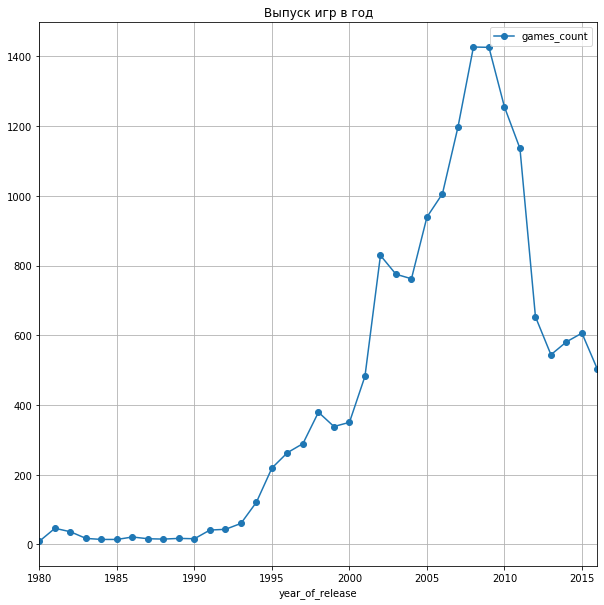

In [15]:
games_per_year = games_per_year[1:]
games_per_year.plot(legend=True, style='o-', grid=True, figsize=(10, 10),title='Выпуск игр в год')

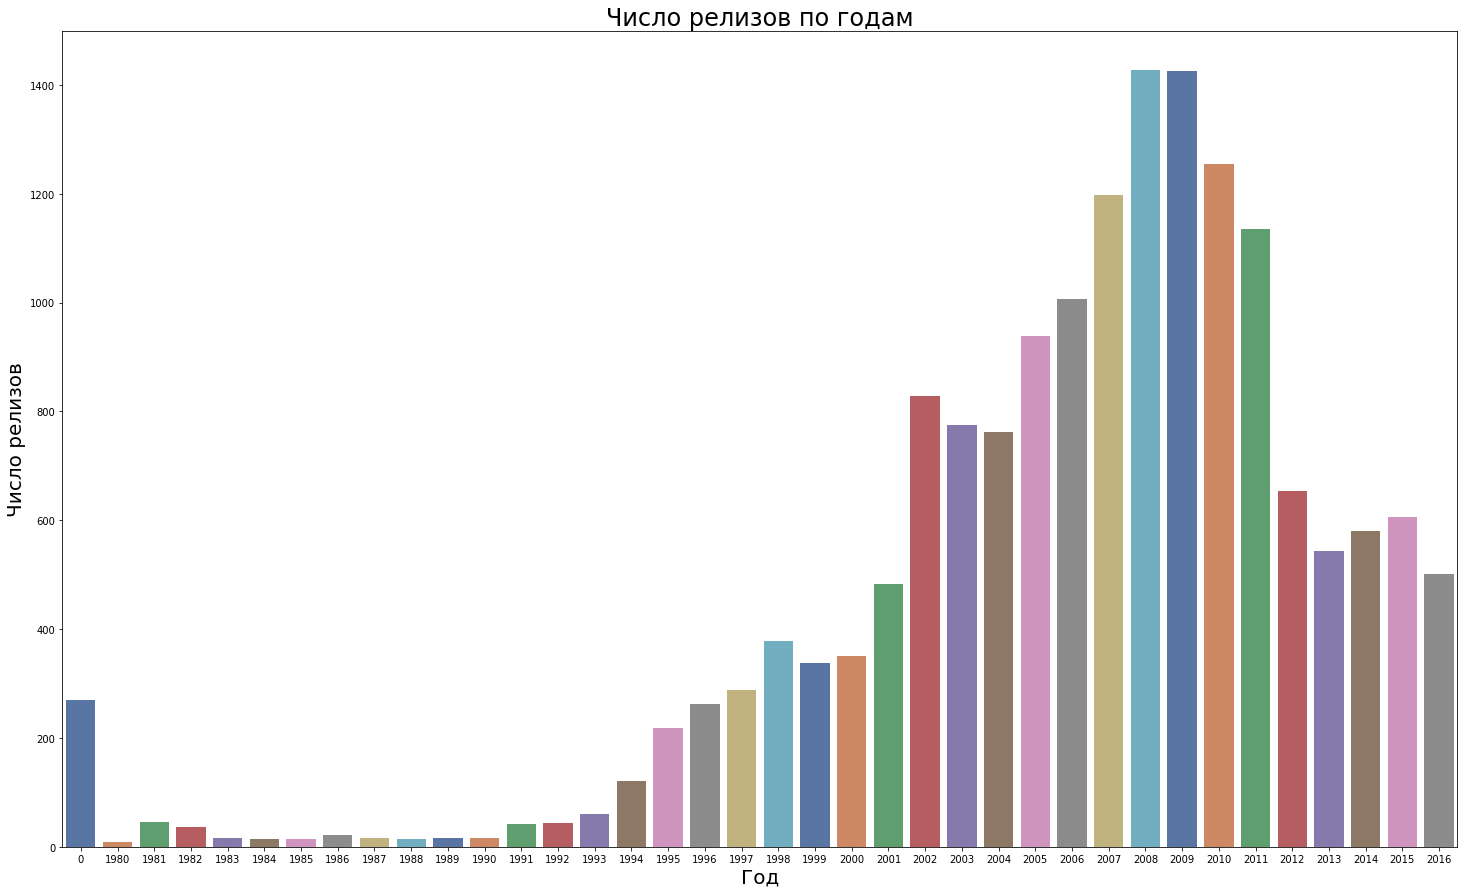

In [16]:
plt.rcParams['figure.figsize'] = (25.0, 15.0)
y = games.groupby(['year_of_release']).count()['world_sales']
x = y.index
ax = sns.barplot(y=y, x=x, palette='deep')
ax.set_xlabel(xlabel='Год', fontsize=20)
ax.set_ylabel(ylabel='Число релизов', fontsize=20)
ax.set_title(label='Число релизов по годам', fontsize=24)
plt.show();

In [17]:
games = games.query('year_of_release > 0')

Мы видим резкий скачок с конца 90-х, это связано с технологическими инновацими,развитием интернета и ростом аудитории игровой индустрии.
Пик приходится на 2009 год, далее наблюдается тенденция к снижению количества игр, этол связано с ростом уровня сложности их производства и цикл разработки новойй игры значительно увеличился. Рынок монополизируется, и для разработки успешной игры требуется большое количество ресурсов. Нам важен период последних пяти-шести лет.

2. Посмотрим, как менялись продажи по платформам.

In [18]:
platforms = pd.pivot_table(games, index=['platform'], values='world_sales', aggfunc='sum')
platforms = platforms.sort_values('world_sales',ascending=False)
platforms

,world_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Нас интересуют наиболее успешные полатформы, изучим их распределение по годам.

In [19]:
top_six_pl = list(platforms.index[:6])

In [20]:
for platform in top_six_pl:
    print('Платформа ',platform)
    platforms = pd.pivot_table(
        games.query('platform == @platform'), index=['platform','year_of_release'], values='world_sales', aggfunc='sum')
    print(platforms)
    print()

Платформа  PS2
                          world_sales
platform year_of_release             
PS2      2000                   39.17
         2001                  166.43
         2002                  205.38
         2003                  184.31
         2004                  211.81
         2005                  160.66
         2006                  103.42
         2007                   75.99
         2008                   53.90
         2009                   26.40
         2010                    5.64
         2011                    0.45

Платформа  X360
                          world_sales
platform year_of_release             
X360     2005                    8.25
         2006                   51.62
         2007                   95.41
         2008                  135.26
         2009                  120.29
         2010                  170.03
         2011                  143.84
         2012                   99.74
         2013                   88.58
         2014     

In [21]:
best = pd.pivot_table(games, index=['platform','year_of_release'], 
                                     values='world_sales', aggfunc = 'sum')
best_all = pd.pivot_table(games, index='platform', 
                                     values='world_sales', aggfunc = 'sum')
best_all.sort_values('world_sales', ascending=False)

,world_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


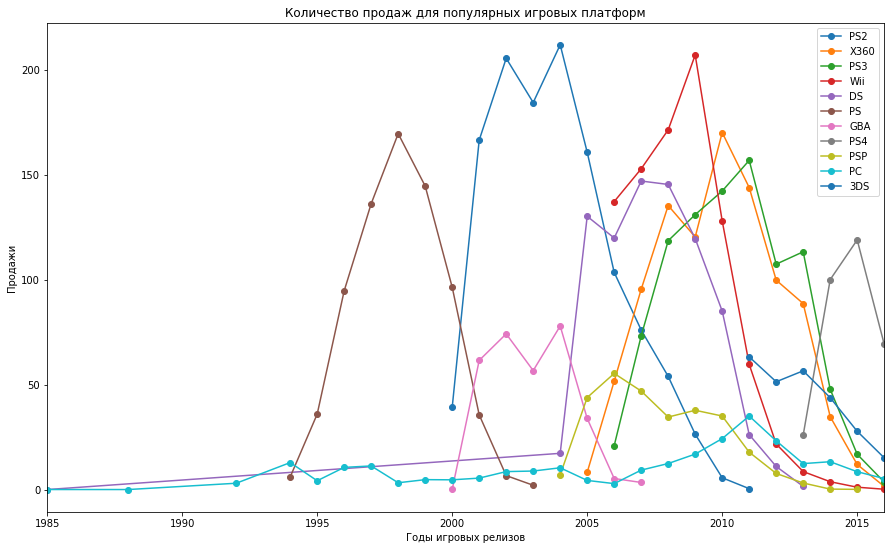

In [22]:
best_all_time = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC', '3DS']
bs_all = best.reset_index(level=0)
for i in best_all_time:
    bs_all.loc[bs_all['platform'] == i]['world_sales'].plot(figsize=(15, 9), style='o-', label=i, title='Количество продаж для популярных игровых платформ').set(xlabel='Годы игровых релизов', ylabel='Продажи')
    plt.legend()

- PS2 - 2000-2009
- X360 - 2006-2014
- PS3 - 2006-2015
- Wii - 2006-2013
- DS - 2005-2012
- PS - 1994-2002

В среднем цикл использования платформы равен 7-9 годам, новые платформы выпускаются примерно раз в пять лет, и игры на старую платформу выпускают еще несколько лет после этого.

3. Определим актуальный период.

После второго шага можем сказать, что более актуальными будут данные, начиная с 2013 года, когда вышло восьмое поколение консолей. Таким образом в прогноз попадут игры, которые уже несколько лет разрабатываются и актуальность платформ будет учтена.

4. Избавимся от данных за предыдущие годы, отфильтровав их.

In [23]:
actual_games = games.query('year_of_release >= 2013')
actual_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16712
Data columns (total 12 columns):
name               2233 non-null object
platform           2233 non-null object
year_of_release    2233 non-null int64
genre              2233 non-null object
na_sales           2233 non-null float64
eu_sales           2233 non-null float64
jp_sales           2233 non-null float64
other_sales        2233 non-null float64
critic_score       2233 non-null float64
user_score         2233 non-null float64
rating             2233 non-null object
world_sales        2233 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


5. Изучим поведение продаж платформ в новом датасете, определим, какие растут, какие падают. 

In [24]:
best_sales = pd.pivot_table(actual_games, index=['platform','year_of_release'], 
                                     values='world_sales', aggfunc = 'sum')
best_sales

world_sales
platform year_of_release             
3DS      2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
DS       2013                    1.54
PC       2013                   12.38
         2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
PSP      2013                    3.14
         2014                    0.24
         2015                    0.12
PSV      2013                   10.59
         2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18
WiiU     2013                   21.65
         2014                   22.03
         2015                   16.35
         2016                    4.60
X360     2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

In [25]:
best_sales_all = pd.pivot_table(actual_games, index='platform', 
                                     values='world_sales', aggfunc = 'sum')
best_sales_all.sort_values('world_sales', ascending=False)

,world_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


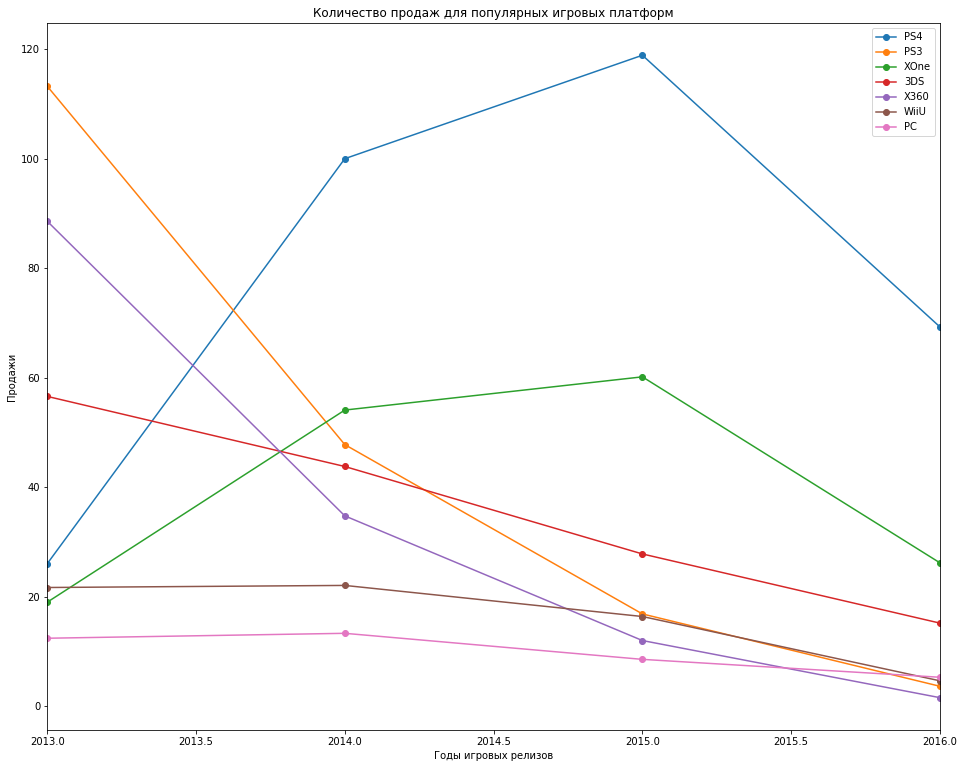

In [26]:
bs = best_sales.reset_index(level=0)
top_seven = ['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC']
for i in top_seven:
    bs.loc[bs['platform'] == i]['world_sales'].plot(figsize=(16, 13), style='o-', label=i, title='Количество продаж для популярных игровых платформ').set(xlabel='Годы игровых релизов', ylabel='Продажи')
    plt.legend()

Лидерами рынка в последние годы являются PS4, XOne, 3DS.

Приставки последнего поколения(ps4, xbox1) показывают лучшие продажи, продажи приставок старого поколения падают, как и весь рынок в целом. Падают продажи на pc, это говорит о том, что игроки предпочитают играть на консолях. Также мы видим, что проходит пик популярности приставок последнего поколения, скорее всего в ближайшее время должны выйти новые версии.

6. Построим боксплот по глобальным продажам игра в разбивке по платформам.

(0, 3)

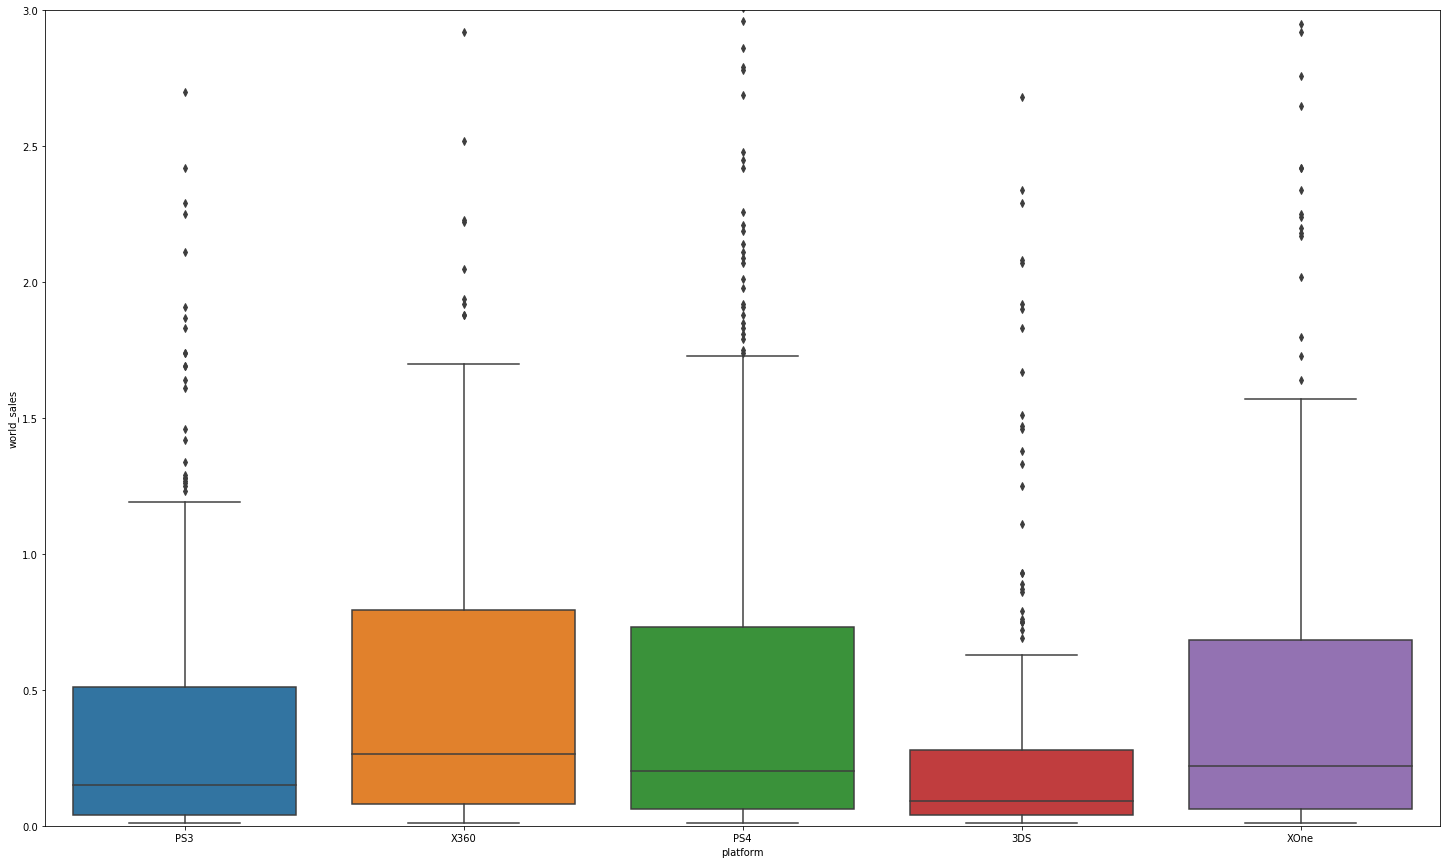

In [27]:
boxplot_five = actual_games.query('platform == "PS4" or platform == "PS3" or platform == "XOne" or platform == "3DS" or platform == "X360"')

ax = sns.boxplot(x='platform', y='world_sales', data=boxplot_five)
ax.set_ylim(0,3)

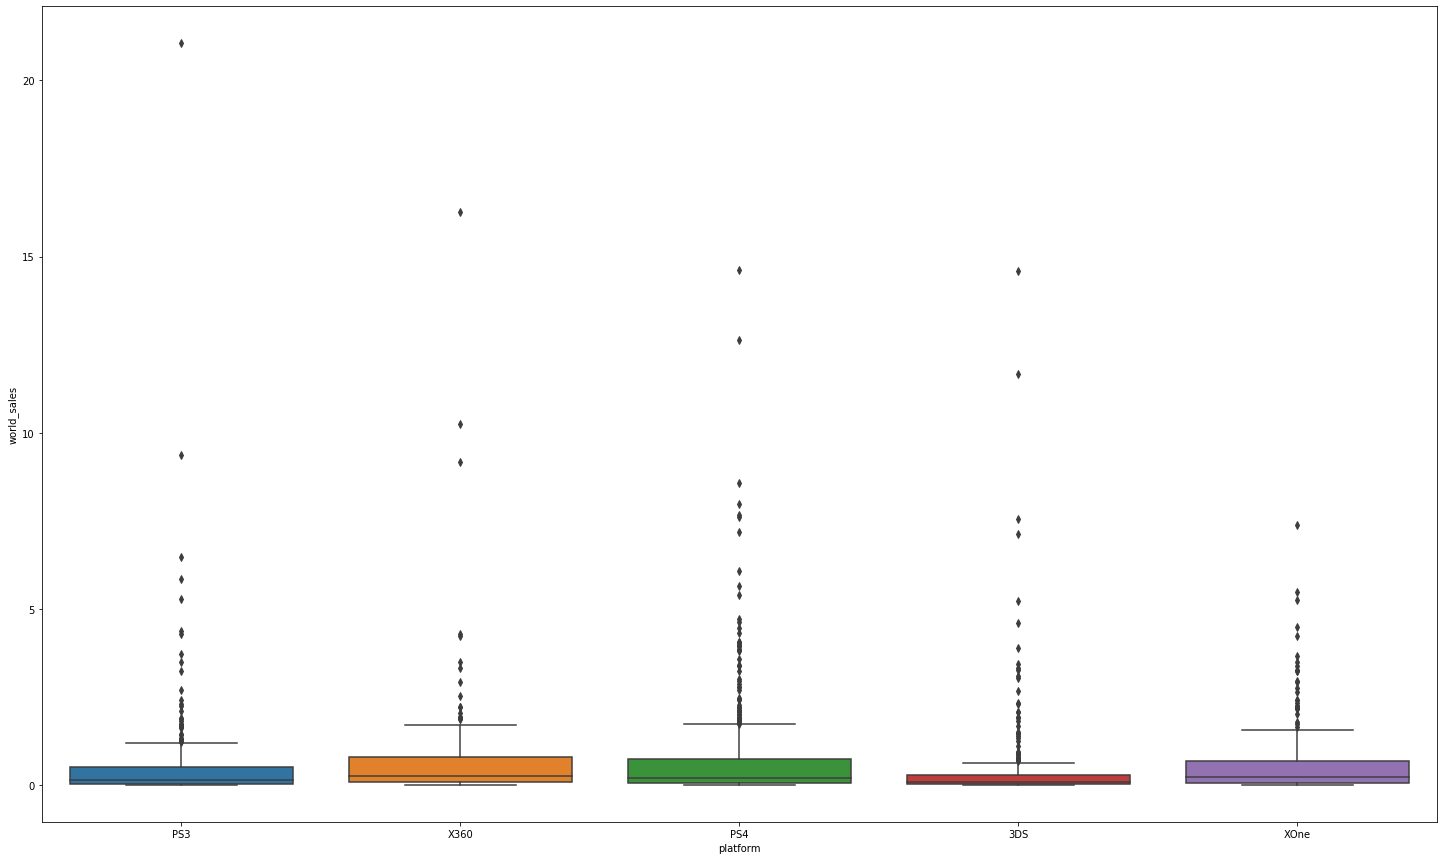

In [28]:
ax = sns.boxplot(x='platform', y='world_sales', data=boxplot_five)

Построим в двух масштабах для удобства восприятия.

Видно, что на продажи сильно влияют выбросы в виде игр, продававшихся Очень большим тиражом. Особенно это заметно с случае 3DS, со которая идет на 3 месте по средним продажам, хотя медианные у неё при этом очень малы. Возможно, это происходит во время выпуска эксклюзивов наподобие Pokemon.

Может сложиться впечатление, что иксбокс360 и пс3 еще на коне, но это связано с тем, что мы захватили 2013 года, таким образом у них фора в год перед консолями четвертого поколения. Несмотря на это показатели новых платформ превзошли их буквально за два года.

7. Посмотрим, как влияют отзывы пользователей и критиков на продажи внутри одной консоли.

In [39]:
actual_games_plus = actual_games.query('(critic_score != -1) and (user_score != -1) and (rating != -1)')

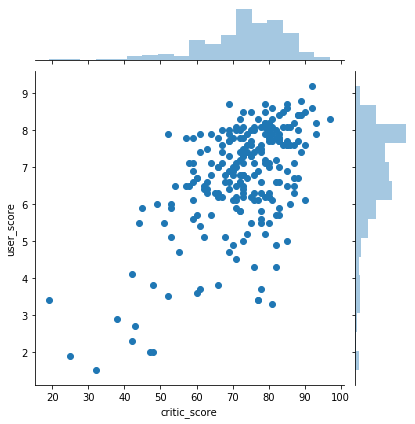

In [30]:
ps4 = actual_games_plus[actual_games_plus['platform']=='PS4']
sns.jointplot(x='critic_score', y='user_score', 
              data=ps4, kind='scatter');

In [31]:
ps4['critic_score'].corr(ps4['user_score'])

0.572801796766868

Корреляция между отзывами критиков и пользователей прямая и средняя, в основном мнения совпадают. 

In [32]:
ps4[['world_sales', 'critic_score', 'user_score']].corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.403573,-0.030888
critic_score,0.403573,1.000000,0.572802
user_score,-0.030888,0.572802,1.000000


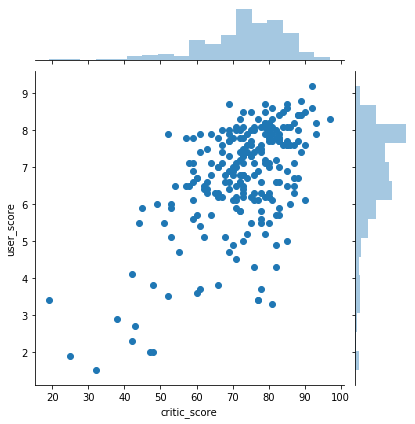

In [33]:
xone = actual_games_plus[actual_games_plus['platform']=='XOne']
sns.jointplot(x='critic_score', y='user_score', 
              data=ps4, kind='scatter');

In [34]:
xone['critic_score'].corr(xone['user_score'])

0.49125469891145906

In [35]:
xone[['world_sales', 'critic_score', 'user_score']].corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.409930,-0.075916
critic_score,0.409930,1.000000,0.491255
user_score,-0.075916,0.491255,1.000000


У прямого конкурента пс4 - хбокс1, матрица корреляции очень похожа.

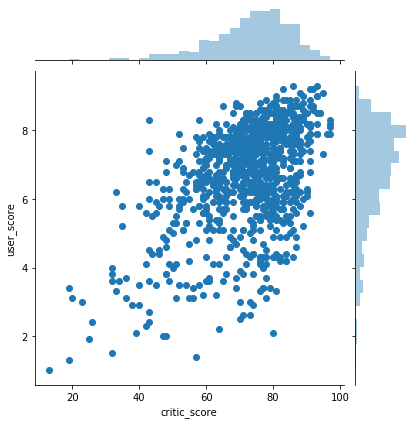

In [36]:
sns.jointplot(x='critic_score', y='user_score', 
              data=actual_games_plus, kind='scatter');

In [37]:
actual_games_plus[['world_sales', 'critic_score', 'user_score']].corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.312102,0.000705
critic_score,0.312102,1.000000,0.510135
user_score,0.000705,0.510135,1.000000


Как видно из корреляционной матрицы, зависимости между отзывами пользователей и объёмом продаж нет (близка к 0), возможно, использовать отзывы пользователей для прогнозирования рекламной компании нельзя. Критики в большей степени понимают, когда игра будет продаваемой, однако и их рецензии также не слишиком сильно коррелируют с продажами (0.31 - для всех консолей, 0.41 - для иксбокс1, 0.4 - для пс4). Между отзывами критиков и пользователей корреляция есть. Возможно, пользователи формируют мнение об игре под влиянием оценки критиков. 

8. Изучим распределение по жанрам

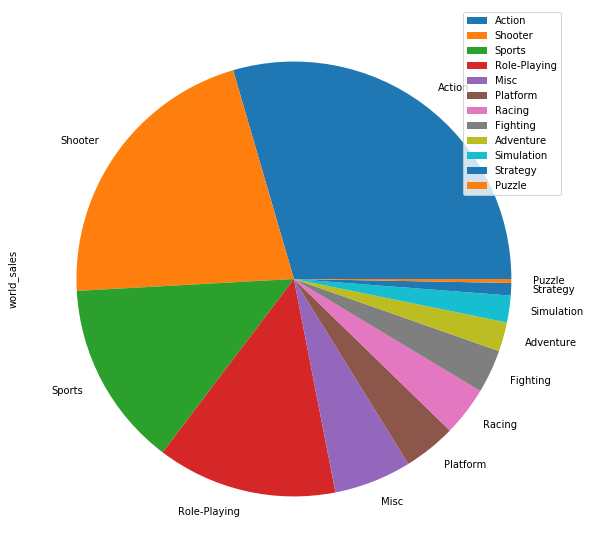

In [40]:
actual_games.pivot_table(index = 'genre', values = 'world_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'world_sales').plot(kind='pie', figsize=(10,10), y= 'world_sales')


In [41]:
actual_games.pivot_table(index = 'genre', values = 'world_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'world_sales')

,world_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


Судя по круговой диаграмме и сводной таблице можем сказать, что наиболее прибыльными являются четыре жанра:
- экшн
- шутеры
- спортивные симуляторы
- рпг

Наименее популярные:
- пазлы
- стратегии
- симуляторы
то есть игры, требующие усидчивости и больших затрат времени.

# 4.Составим портрет пользователя каждого региона(NA, EU, JP).

1. Самые популярные платформы (топ-5)

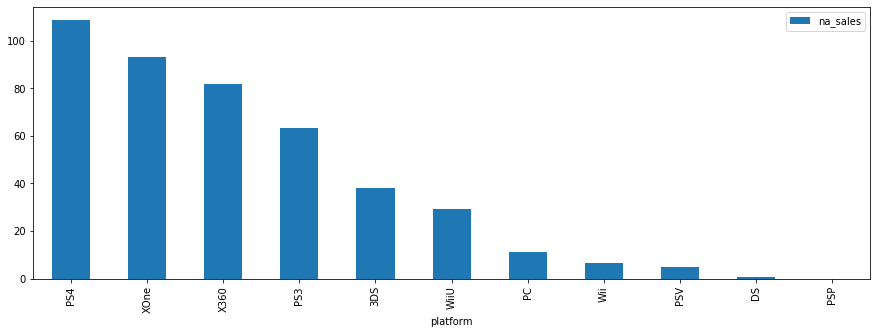

In [42]:
actual_games.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(15,5))

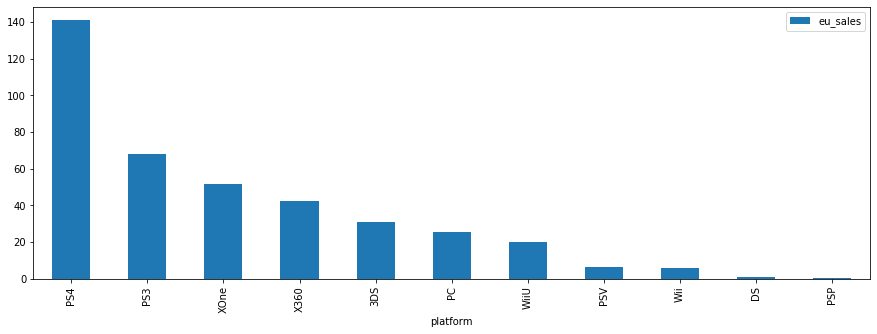

In [43]:
actual_games.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(15,5))

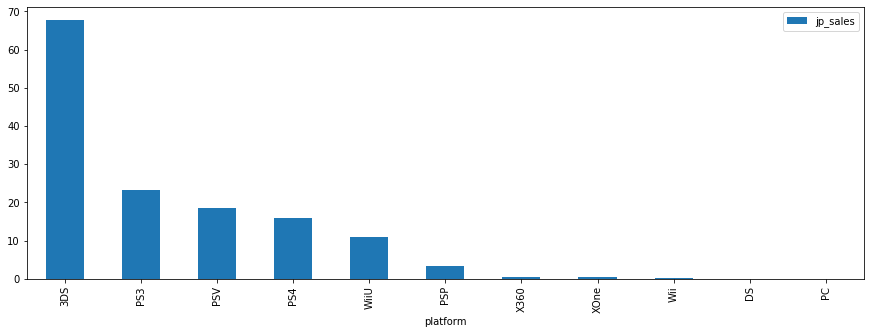

In [44]:
actual_games.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind = 'bar', figsize=(15,5))

Существует большая разница между регионом в плане предпочитаемых консолей. В Японии преобладает Нинтендо, за ней идет Сони, обе местные, причем большой популярностью пользуются именно портативные консоли. Северная Америка активно пользуется почти всем, при этом в этом регионе больше всего продаж иксбок в сравнении с другими, так как это продукции компании майкрософт. Европа большее предпочтение отдаёт приставкам сони, хотя показатели иксбокс тоже довольно высоки.

2.Самые популярные жанры (топ-5)

In [45]:
actual_games.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales')

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14
Fighting,15.55
Racing,12.96
Adventure,7.14


In [46]:
actual_games.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales')

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Misc,20.04
Platform,15.58
Simulation,10.92
Fighting,8.55


In [47]:
actual_games.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales')

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


С жанрами дела обстоят несколько иначе:

В СА и Европе очень схожиме предпочтения, в лидерах экшн, шутеры, спорт, а вот в Японии - рпг, экшн и аркады - это обсуловлено аутентичной японской культурой, а также предпочтением японцев играть на портативных консолях, для шутеров они не очень удобны. Аутсайдеры везде одни - паззлы и стратегии.

3. Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе

In [48]:
ESRB = actual_games.pivot_table(index = 'rating', values = ['eu_sales','jp_sales','na_sales'], aggfunc = 'sum')
ESRB

,eu_sales,jp_sales,na_sales
rating,,,
-1,78.91,85.05,89.42
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
T,41.95,20.59,49.79


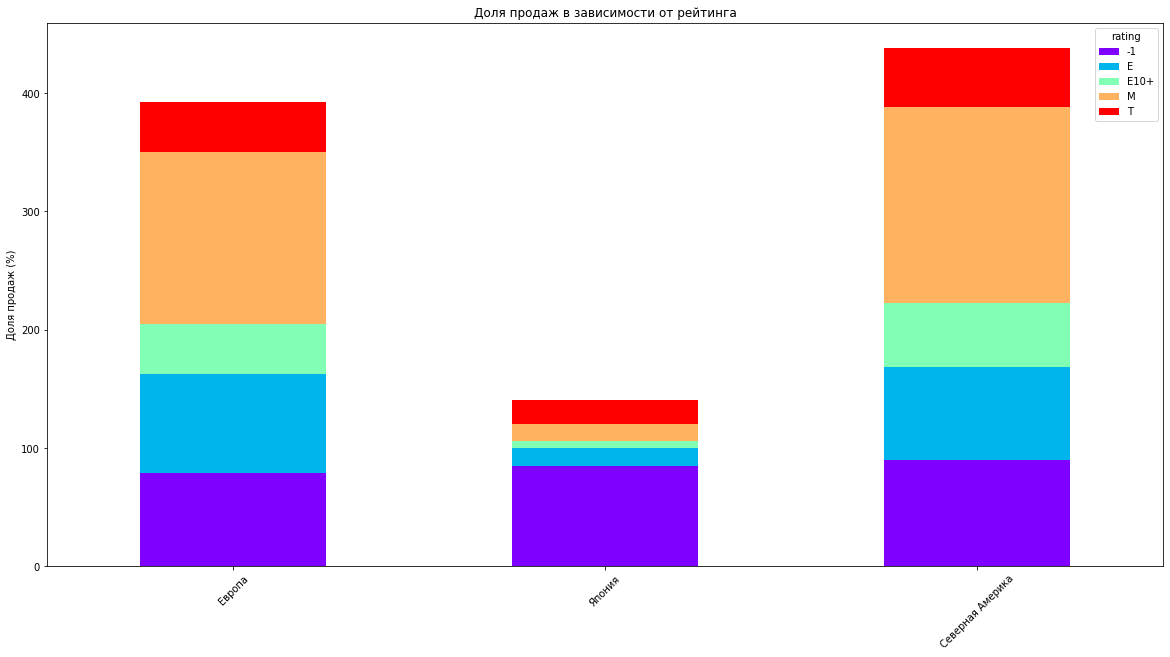

In [50]:
ESRB.T.plot(kind='bar',
                       figsize=(20,10),
                       stacked=True,
                       colormap= 'rainbow')


plt.title('Доля продаж в зависимости от рейтинга')
plt.ylabel('Доля продаж (%)')
locs, _ = plt.xticks()
plt.xticks(locs,['Европа', 'Япония', 'Северная Америка'],
           rotation=45)
plt.show()

Получается, что рейтинг действительно влияет на продажи игры. При этом в Америке и Европе ситуация практически одинаковая (игры с рейтингом M покупают чаще всего).

Япония традиционно выбивается из общих показателей, при этом самый популярный рейтинг Т, говорит о большой долее тинейджеров среди игроков. Кроме того очень бросается в глаза соотношение игр без рейтинга к общему количеству игр в Японии - их больше половину. Поэтому сложно дать корректную оценку, по этому вопросу потребуется отдельное исследование. Возможно это связано с тем, что esrb базируется в СА, а многие японские игры являются локальными и больше ориентированы на внутренний рынок, а для этих целей у них есть своё внутреннее агенство CERO.

**Общий вывод**


Американский игрок - от 17 лет, любит играть или на PS4, или на XOne, любит игры на реакцию и шутеры. Европейский игрок - от 17 лет, любит играть на PS4, любит игры на реакцию и шутеры. Японский игрок - от 13 лет, любит играть на переносных платформах 3DS или PSV, любит RPG и экшены.

# 5. Проверка гипотез.

В качестве уровня статистической значимости принимается значение 0.05 в обоих случаях.

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H0 — средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H1 — средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [105]:
final_data = actual_games.query('(user_score != -1) and (critic_score != -1)')

In [107]:
xbox_one = final_data[final_data['platform'] == 'XOne']['user_score']
pc = final_data[final_data['platform'] == 'PC']['user_score']


print('cреднее xbox_one: ',pd.Series(xbox_one).mean())
print('cреднее pc: ',pd.Series(pc).mean())

alpha = 0.05

results =  st.ttest_ind(
    xbox_one, 
    pc)
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

cреднее xbox_one:  6.538181820782748
cреднее pc:  6.302027053929664
p-value: 0.17306931236898054
Не получилось отвергнуть нулевую гипотезу


В целом можно сказать, что средние рейтинги платформ Xbox и PC не сильно отличаются. При заданном уровне статистической значимиости не удалось опровергнуть нулевую гипотезу.

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H0 — средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

H1 — средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [109]:
action = final_data[final_data['genre'] == 'Action']['user_score']   
sport = final_data[final_data['genre'] == 'Sports']['user_score']


print('cреднее action: ',pd.Series(action).mean())
print('cреднее sport: ',pd.Series(sport).mean())

alpha = 0.05

results =  st.ttest_ind(
    action, 
    sport)
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

cреднее action:  6.936245979228838
cреднее sport:  5.665454542636871
p-value: 1.6840971995799738e-16
Отвергаем нулевую гипотезу


Рейтинги жанров action и sport различаются. Только на основании проверки гипотезы мы не можем заявить, какой рейтинг выше, а какой - ниже, но можно сказать, что он различается. Нулевая гипотеза опровергнута. Средний пользовательский рейтинг  экшенов выше. 

# 6. Общий вывод.

Был проведен анализ исторических данных о продажах игр, оценках пользователей и экспертов, жанрах и платформах. Таблица с данными содержала 16715 записей о играх разных времен.

Были обнаружены пропущенные значения. К сожалению, заполнить их через API https://rawg.io/ не удалось. Поэтому было принято решение оставить данные без изменений, пометив их -1. Лучше работать с меньшим количеством данных, но более качественным. Для проведения анализа, на мой взгляд, качественных данных вполне хватило.

Определили актуальный период - 8 поколение консолей, которое пришлось на конец 2013 года.

В актуальный период растут продажи игр для PS4 и Xbox One. Именно они являются потенцеально самыми прибыльными платформами в 2017 году.

Отзывы критиков влияют на продажи слабо, корреляция около 0.4, отзывы пользователей не влияют вовсе, зависимость близка к нулевой. Однако, по графикам видно, что в целом игры с высокими продажами получали хорошие отзывы от критиков и почти всегда хорошие отзывы от пользователей.

Самыме большие суммарные продажи приходятся на жанры Action, Shooter, Sports и Role-Playing. 

Что касается регионов, то между Северной Америкой и Европой нет больших различий. В среднем они предпочитают одни и те же жанры и играют на одних и тех же платформах (однако, в Северной Америке гораздо чаще покупают Microsoft Xbox One). В Европе он практически не составляет конкуренции безоговорочному лидеру - Sony PS4). В Японии сложился свой  аутентичный рынок компьютерных игр. Там наиболее популярны портативные консоли (например 3DS и PSV). Также выявили, что в наших данных у японских игр очень большой процент отсутствия рейтинга, предполагаем, что это связано с тем, что им удобнее получать рейтинг в организации CERO, которая является местной, и если игра рассчитана на внутренний рынок, то этого достаточно.

Подтверждена гипотеза о том, что в среднем пользовательские рейтинги на PC и Xbox - одинаковы. Пользовательские рейтинги жанров Action и Sports - различны. Играм жанра Action гораздо проще найти свою аудиторию.

В итоге можно сказать, что в 2017 году надо обратить пристальное внимание на игры жанров Action и Shooter, выходящих в Северной Америке и Европе на платформах PS4 и Xbox One. Именно они, вероятнее всего, принесут наибольшую прибыль.